In [1]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

import numpy as np


from sklearn.cross_validation import train_test_split

from numpy import newaxis

from sklearn.metrics import accuracy_score

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from keras.optimizers import RMSprop

In [2]:
from sys import getsizeof

In [3]:
data = np.load("./data/new_training_color_data.npy")

In [4]:
## Data Preprocessing and Reshaping
X = [x[0]/255.0 for x in data]
y = [1 if y[1][0] == 1 else 0 for y in data]

# X_cnn = [x[:,:,newaxis] for x in X]
# X_cnn= np.array(X)
# y = np.array(y)

In [5]:
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.image as mpimg

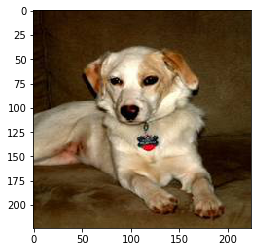

In [6]:
imshow(X[1000])

## Label 1 = Cat 0 = Dog

In [7]:
X_train, X_test , y_train, y_test = train_test_split(X,y)

print("*****************************************************")
print("Data Loaded and data split into training and testing.")

*****************************************************
Data Loaded and data split into training and testing.


In [8]:
def create_color_10_layer_model():
    optimizer = RMSprop(lr=1e-4)
    objective = 'binary_crossentropy'

    model = Sequential()

    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(224, 224, 3), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Flatten())
    # model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.5))

    # model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

    return model

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [9]:
X_train = np.array(X_train)

In [10]:
y_train = np.array(y_train)

In [11]:
color_10_layer_model = create_color_10_layer_model()

In [ ]:
color_10_layer_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 224, 224, 32)  896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 112, 112, 64)  18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [ ]:
print("***************************************************")
print("***************************************************")
print("***************************************************")
print("***************************************************")
print("Fitting 10 Layers CNN Color..")

epochs = 20
history_10_layer = LossHistory()
color_10_layer_model.fit(X_train, y_train, validation_split=0.25, nb_epoch=epochs, batch_size=32, verbose=2, shuffle=True, callbacks=[history_10_layer])

***************************************************
***************************************************
***************************************************
***************************************************
Fitting 10 Layers CNN Color..
Train on 14062 samples, validate on 4688 samples
Epoch 1/20
238s - loss: 0.6935 - acc: 0.4964 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 2/20
236s - loss: 0.6933 - acc: 0.4954 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 3/20
262s - loss: 0.6932 - acc: 0.5049 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 4/20
253s - loss: 0.6934 - acc: 0.4977 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 5/20
276s - loss: 0.6931 - acc: 0.5063 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 6/20
254s - loss: 0.6931 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 7/20
250s - loss: 0.6932 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 8/20
274s - loss: 0.6933 - acc: 0.5018 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 9/20


In [ ]:
# predictions_10_layer = color_10_layer_model.predict_classes(X_test, verbose=2)
# color_10_layer_accuracy = accuracy_score(y_test, predictions_10_layer)

In [ ]:
# print("The accuracy of 10 Layers CNN Color model is: " + str(gray_10_layer_accuracy))


# print("***************************************************")
# print("***************************************************")
# print("Saving 10 Layers CNN Color Model")
color_10_layer_model.save("color_cnn_10_layers.h5")
color_cnn_10_layers_val_losses = np.array(history_10_layer.val_losses)
color_cnn_10_layers_losses = np.array(history_10_layer.losses)
np.save("color_cnn_10_layers_val_losses.npy", color_cnn_10_layers_val_losses)
np.save("color_cnn_10_layers_losses.npy", color_cnn_10_layers_losses)

In [1]:
def create_color_13_layer_model():
    optimizer = RMSprop(lr=1e-4)
    objective = 'binary_crossentropy'

    model = Sequential()

    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(224, 224, 3), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

    return model


print("***************************************************")
print("***************************************************")
print("***************************************************")
print("***************************************************")
print("Fitting 13 Layers CNN Color..")
color_13_layer_model = create_color_13_layer_model()
epochs = 20
history_13_layer = LossHistory()
color_13_layer_model.fit(X_train, y_train, validation_split=0.25, nb_epoch=epochs, batch_size=32, verbose=2, shuffle=True, callbacks=[history_13_layer])

***************************************************
***************************************************
***************************************************
***************************************************
Fitting 13 Layers CNN Color..


NameError: name 'RMSprop' is not defined

In [ ]:
color_13_layer_model.summary()

In [ ]:
# predictions_13_layer = color_13_layer_model.predict_classes(X_test, verbose=2)
# color_13_layer_accuracy = accuracy_score(y_test, predictions_13_layer)


# print("The accuracy of 13 Layers CNN color model is: " + str(color_13_layer_accuracy))


# print("***************************************************")
# print("***************************************************")
# print("Saving 13 Layers CNN color Model")
color_13_layer_model.save("color_cnn_13_layers.h5")
color_cnn_13_layers_val_losses = np.array(history_13_layer.val_losses)
color_cnn_13_layers_losses = np.array(history_13_layer.losses)
np.save("color_cnn_13_layers_val_losses.npy", color_cnn_13_layers_val_losses)
np.save("color_cnn_13_layers_losses.npy", color_cnn_13_layers_losses)